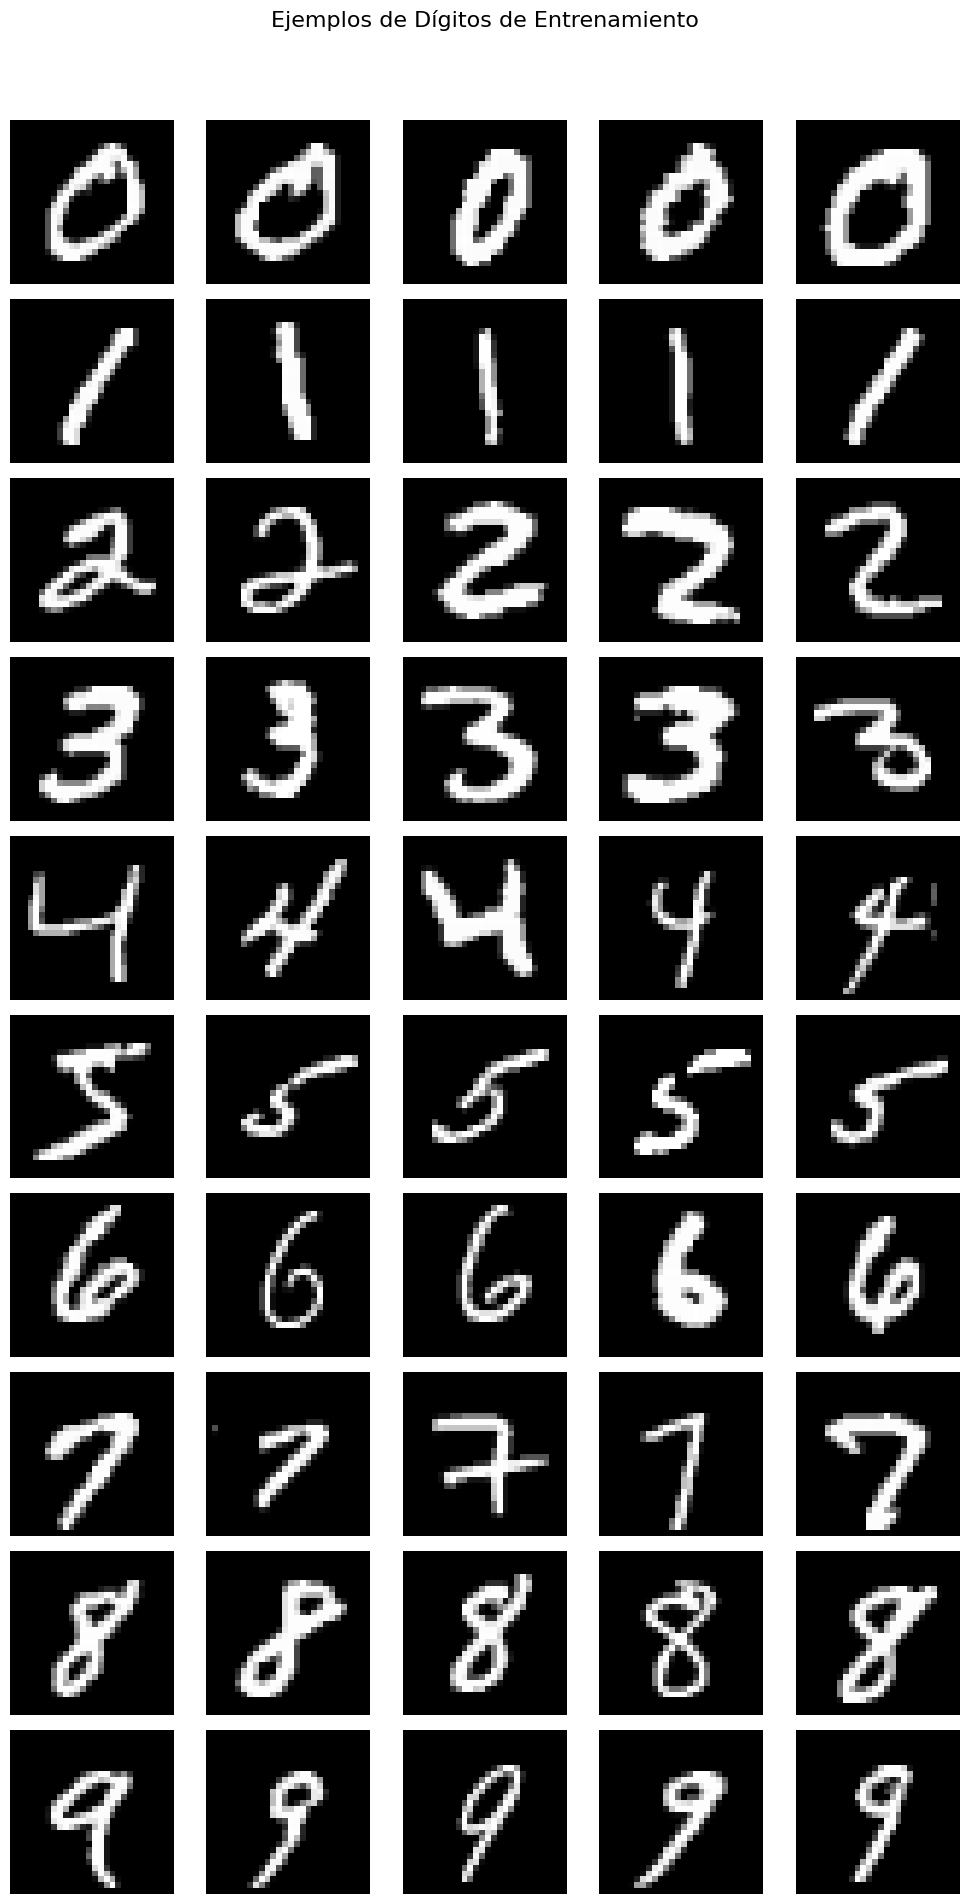

In [1]:
from main import entrenar_y_medir, load_df
from joblib import Parallel, delayed
from tqdm import tqdm
import pandas as pd
from plot import plot_predicted_digits

training_data, test_data = load_df()

In [2]:
net_configs = []
epochs = 30

# Configuración 1: Arquitectura más simple y tasa de aprendizaje media
net_configs.append({
    'architecture': [784, 30, 10],      # 1 capa oculta con 30 neuronas
    'epochs': epochs,                       # 30 épocas de entrenamiento
    'mini_batch_size': 10,              # Tamaño de mini-lote de 10
    'eta': 0.1                          # Tasa de aprendizaje media
})

# Configuración 2: Arquitectura con más capas y tasa de aprendizaje baja
net_configs.append({
    'architecture': [784, 10, 10, 10],  # 3 capas ocultas con 10 neuronas cada una
    'epochs': epochs,                       # 25 épocas de entrenamiento
    'mini_batch_size': 15,              # Tamaño de mini-lote de 15
    'eta': 0.05                         # Tasa de aprendizaje baja
})

# Configuración 3: Más neuronas por capa y tasa de aprendizaje alta
net_configs.append({
    'architecture': [784, 100, 10],     # 1 capa oculta con 100 neuronas
    'epochs': epochs,                       # 25 épocas de entrenamiento
    'mini_batch_size': 5,               # Mini-lotes pequeños de 5
    'eta': 0.2                          # Tasa de aprendizaje alta
})

# Configuración 4: Arquitectura con capas grandes y tasa de aprendizaje baja
net_configs.append({
    'architecture': [784, 512, 256, 10],# 2 capas ocultas con 512 y 256 neuronas
    'epochs': epochs,                       # 30 épocas de entrenamiento
    'mini_batch_size': 8,               # Mini-lotes pequeños de 8
    'eta': 0.01                         # Tasa de aprendizaje baja
})

# Configuración 5: Arquitectura con capas pequeñas y tasa de aprendizaje media
net_configs.append({
    'architecture': [784, 32, 16, 10],  # 2 capas ocultas con 32 y 16 neuronas
    'epochs': epochs,                       # 25 épocas de entrenamiento
    'mini_batch_size': 12,              # Tamaño de mini-lote de 12
    'eta': 0.1                          # Tasa de aprendizaje media
})

In [3]:
# Ejecutar el proceso en paralelo usando joblib.Parallel
results = Parallel(
    n_jobs=-1, backend='loky', prefer="processes"
)(
    delayed(entrenar_y_medir)(config, training_data, test_data) for config in tqdm(net_configs, desc='Procesando configuraciones')
)

Procesando configuraciones: 100%|██████████| 5/5 [00:00<00:00, 360.19it/s]


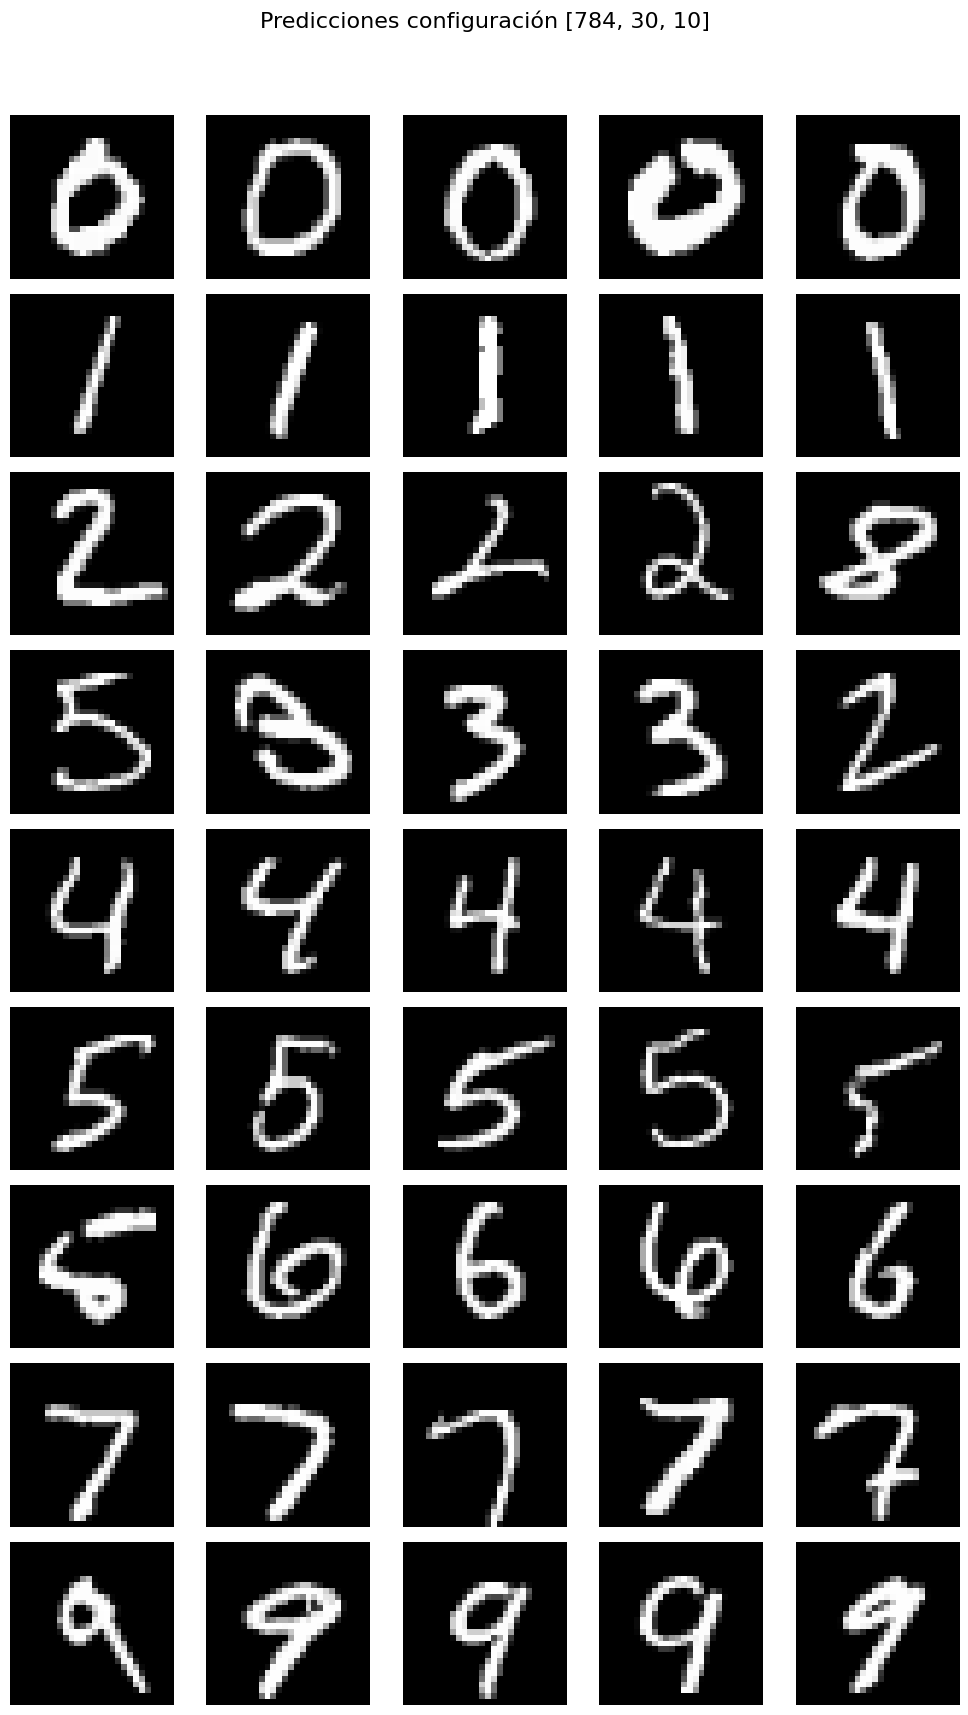

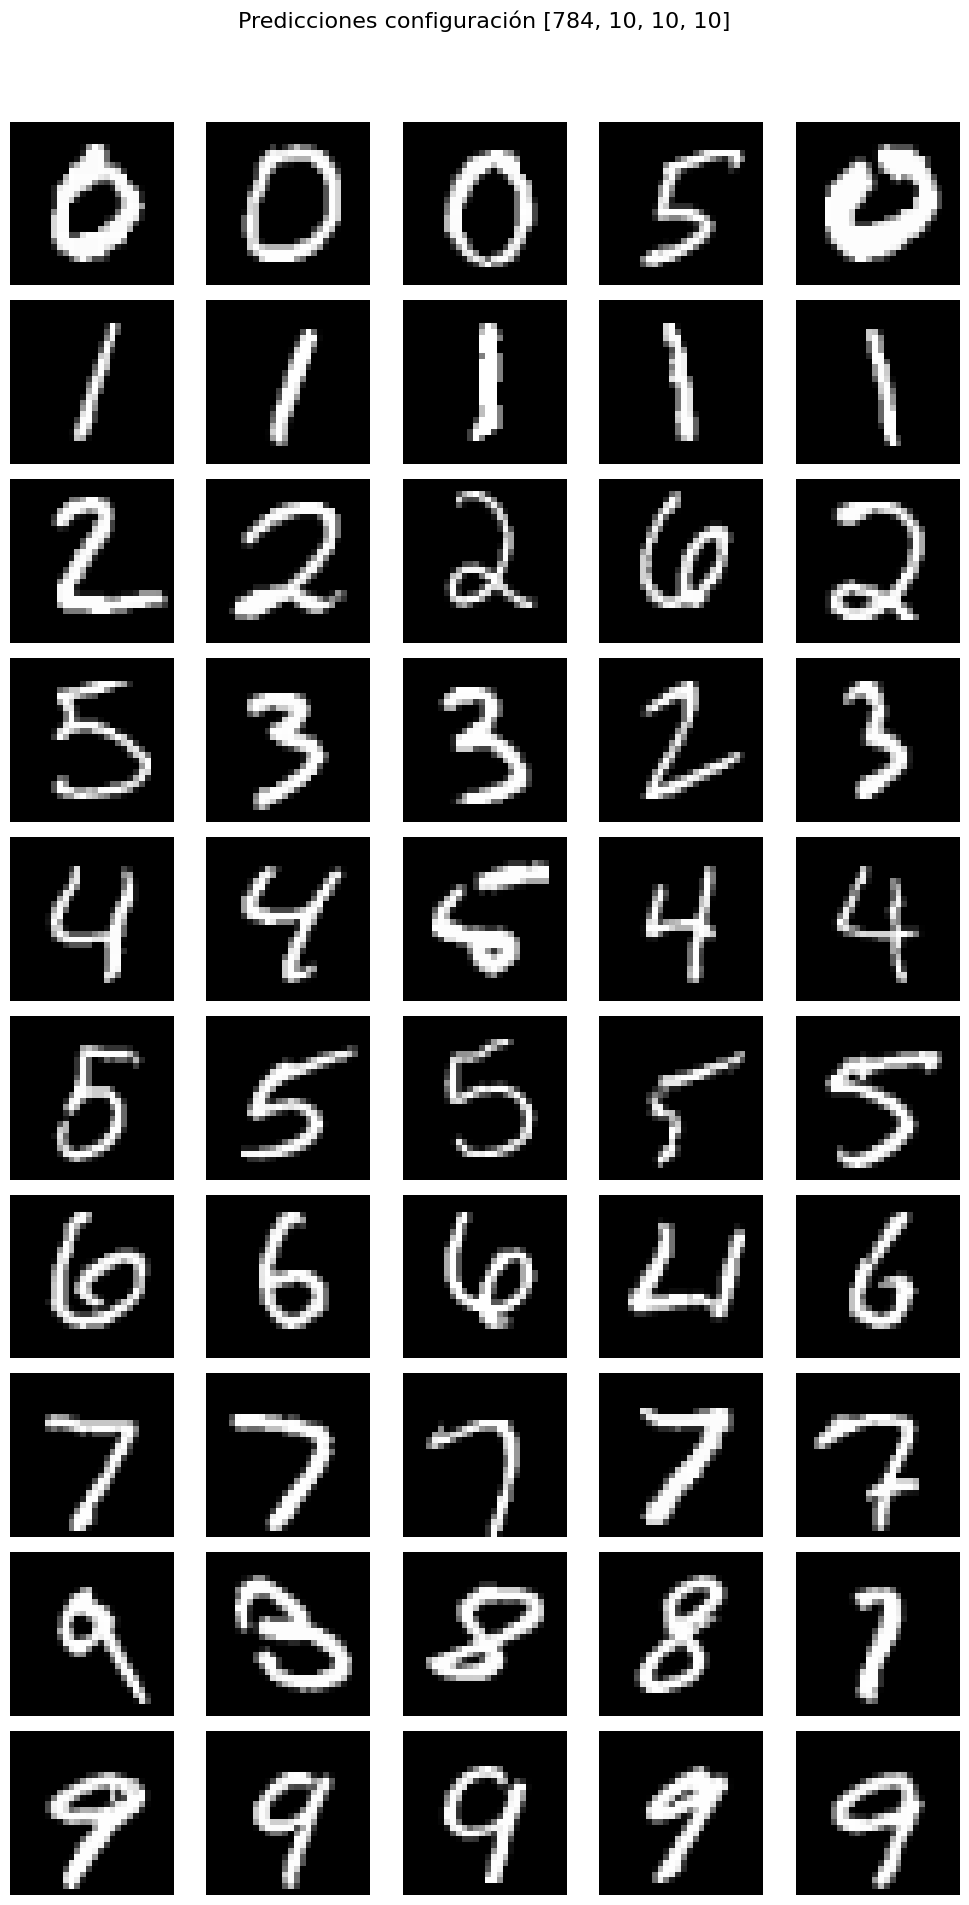

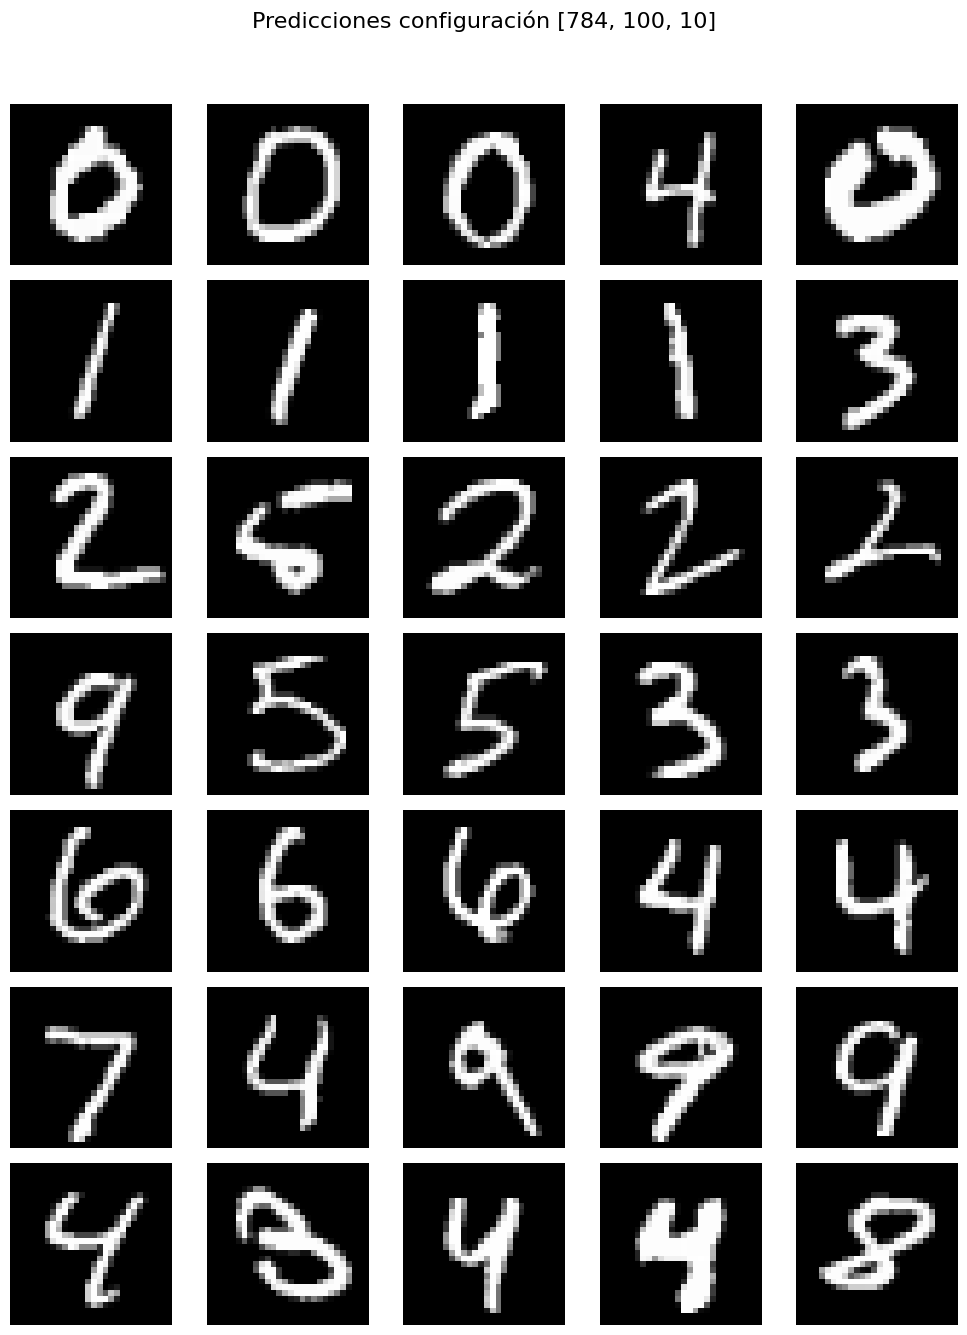

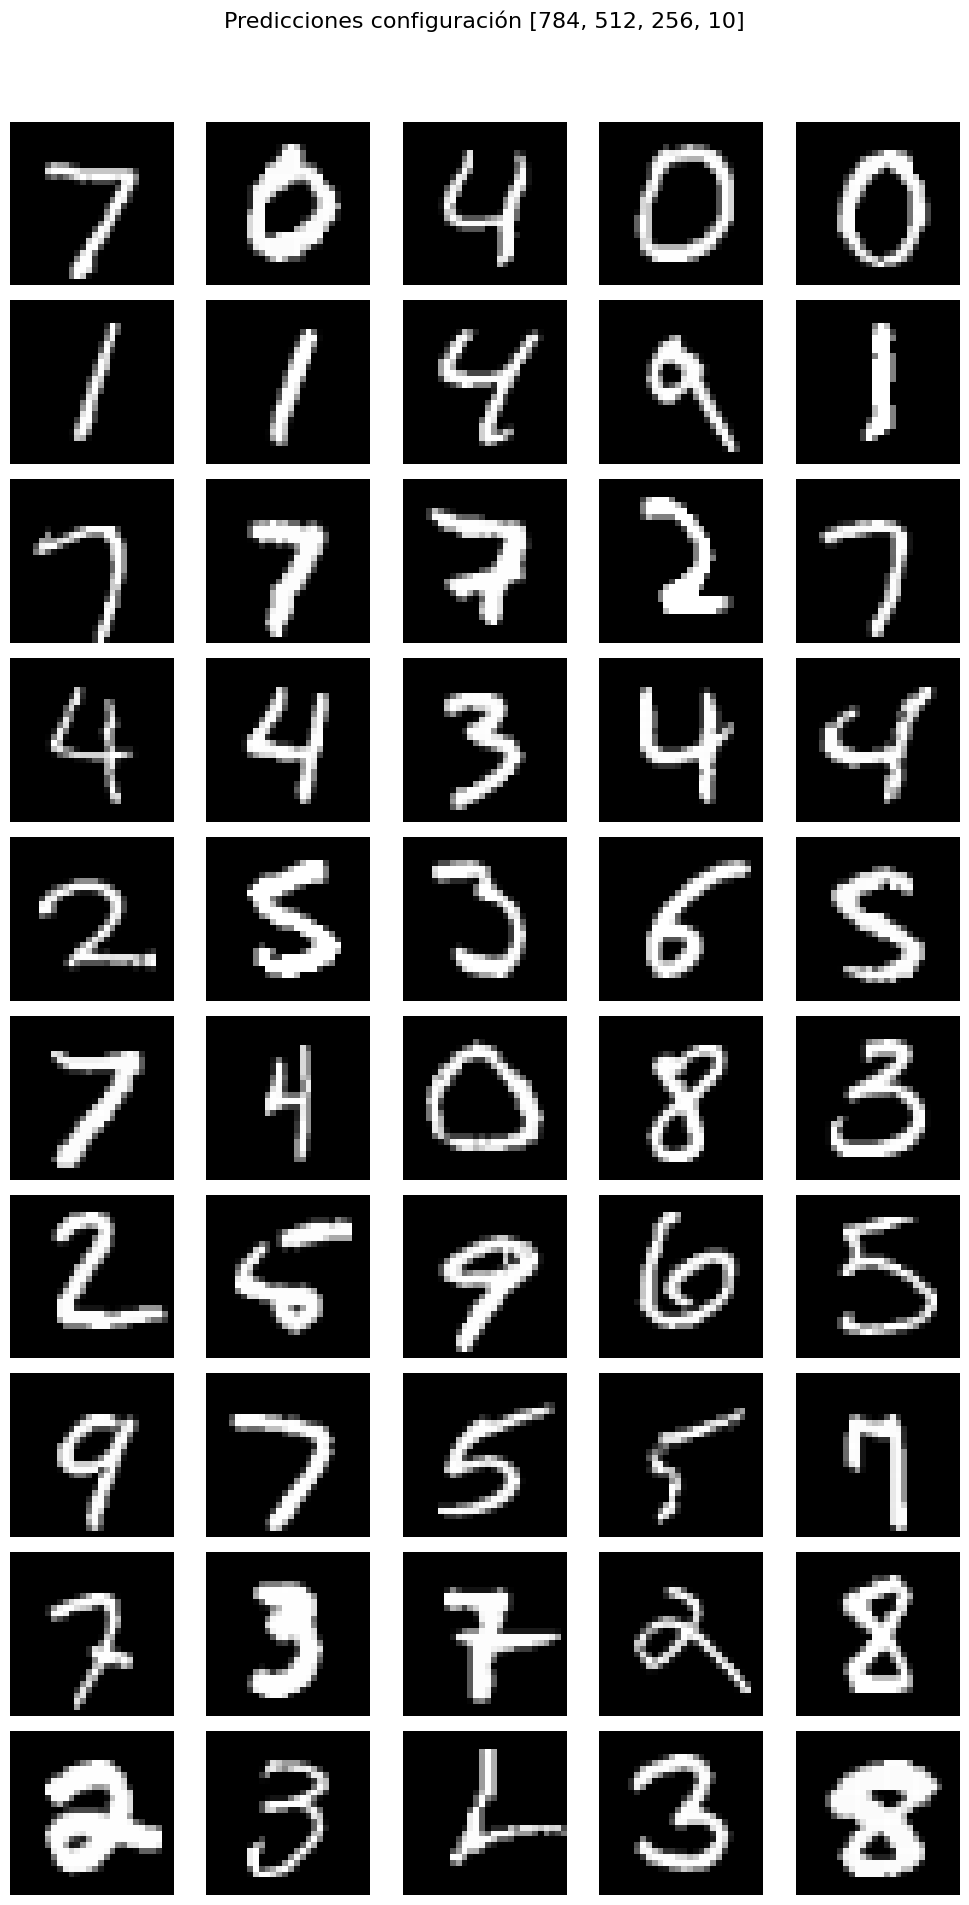

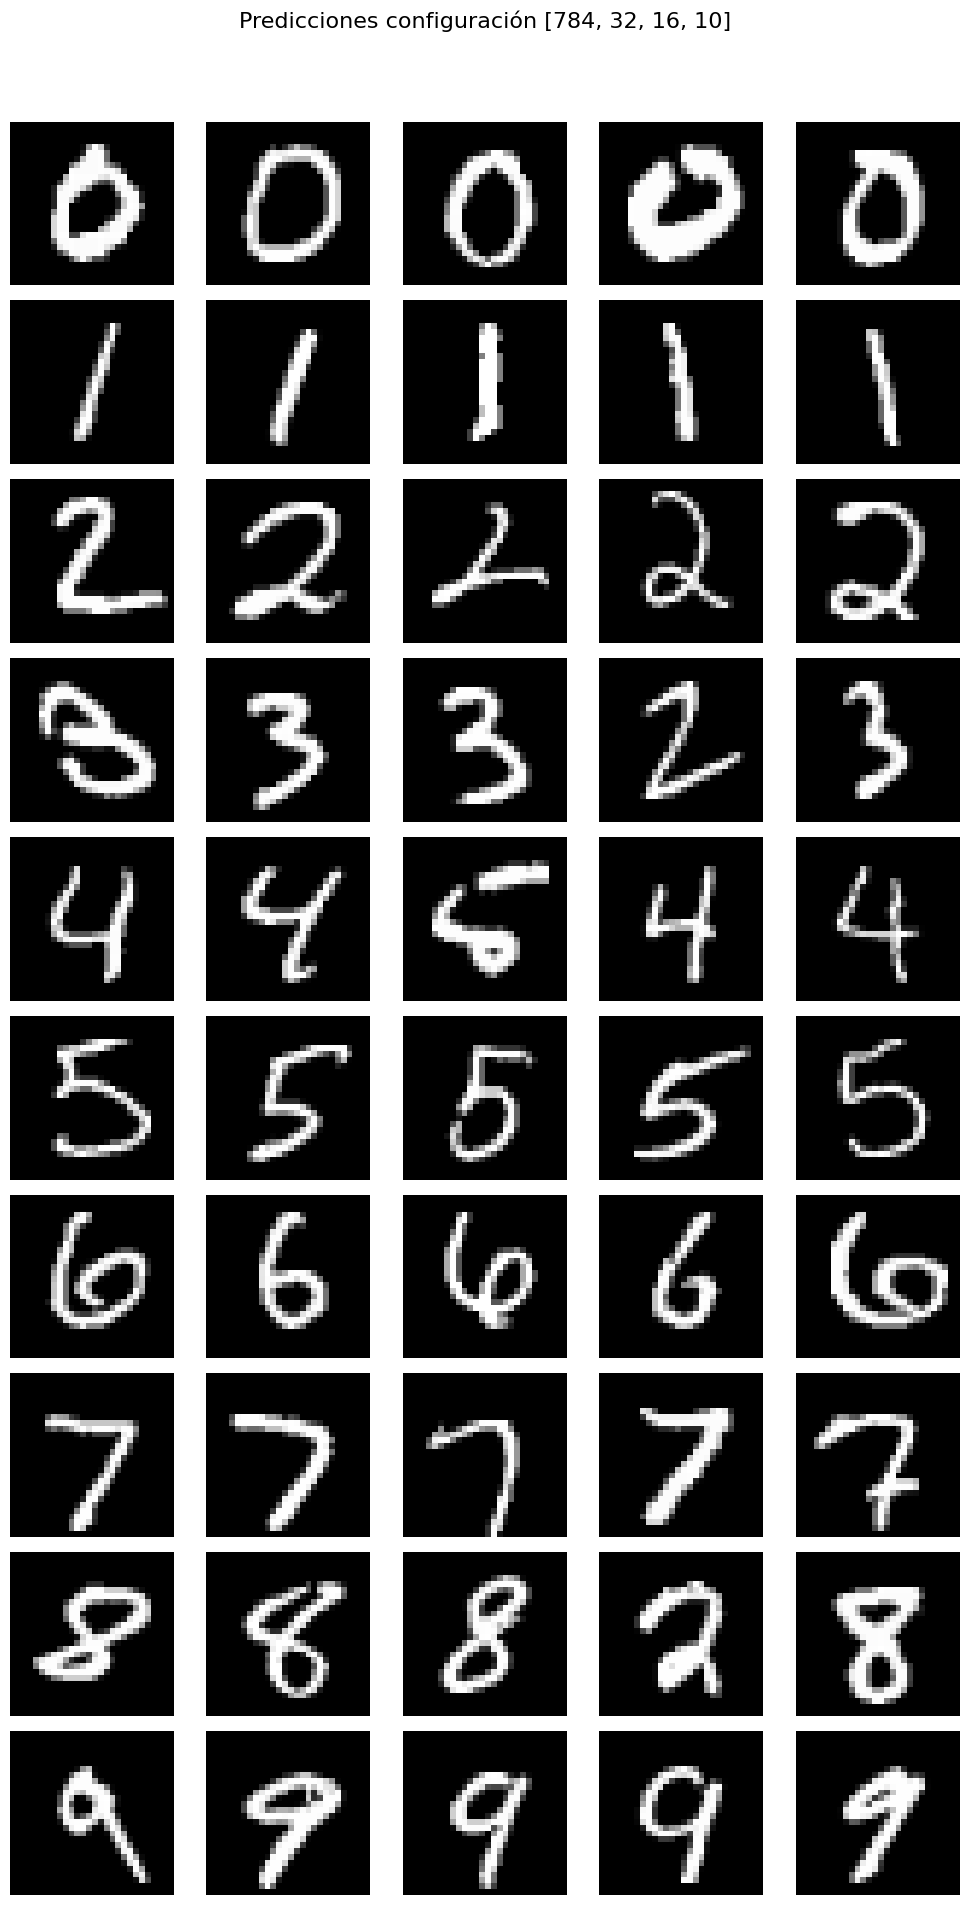

In [34]:
# Itera sobre las listas 'net_configs' y 'results' al mismo tiempo
for config, red in zip(net_configs, results):
    # Asigna el valor precision a la clave 'precision' en cada diccionario 'config'
    config['precision'] = red[1]
    # Asigna el objeto red a cada diccionario
    config['red'] = red[0]
    # Graficar para cada red
    plot_predicted_digits(red[0], test_data, title=f'Predicciones configuración {config["architecture"]}')


In [35]:
# Diccionarios como df
df_results = pd.DataFrame(net_configs)
# Ver resultados
df_results

,architecture,epochs,mini_batch_size,eta,precision,red
0,"[784, 30, 10]",30,10,0.10,84.02,<network.Network object at 0x00000161070971A0>
1,"[784, 10, 10, 10]",30,15,0.05,86.62,<network.Network object at 0x000001610705E810>
2,"[784, 100, 10]",30,5,0.20,67.70,<network.Network object at 0x00000161098C7F50>
3,"[784, 512, 256, 10]",30,8,0.01,31.99,<network.Network object at 0x0000016106F9C3E0>
4,"[784, 32, 16, 10]",30,12,0.10,91.92,<network.Network object at 0x0000016107005190>
